In [7]:
from modules.read_text import read_text as rt

file = 'pictures/nemlig_cornflakes.jpeg'
brand, name = rt.get_txt(file)
print(name, brand)

cornflakes nemlig


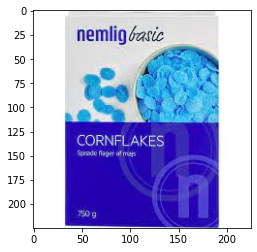

In [8]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(file)
plt.imshow(img)

In [9]:
from modules.scraping import main as scrape

cereals = scrape.get_cereal(name, brand)
for cereal in cereals:
    print(cereal)

Irmas Økologiske Cornflakes. 500 grams. Costs: {'irma': 58.0}. Nutrition(371.0, 8.0, 80.0, 5.0, 1.0, 1.2)
Irmas Hverdag Økologiske branflakes. 375 grams. Costs: {'irma': 74.53}. Nutrition(355.0, 11.0, 65.0, 15.0, 2.3, 0.9)
Kellogg's Cornflakes. 500 grams. Costs: {'nemlig': 65.9}. Nutrition(378.0, 7.0, 84.0, 3.0, 0.9, 1.13)
nemlig basic Cornflakes. 750 grams. Costs: {'nemlig': 21.91}. Nutrition(369.0, 7.2, 80.0, 1.6, 1.2, 1.3)
EASIS Cornflakes. 375 grams. Costs: {'nemlig': 74.53}. Nutrition(401.0, 8.8, 76.4, 15.1, 3.2, 0.98)
Nestlé Cornflakes. 375 grams. Costs: {'nemlig': 93.2}. Nutrition(381.0, 7.4, 82.6, 0, 1.4, 1.82)
Urtekram Cornflakes øko.. 375 grams. Costs: {'nemlig': 71.87}. Nutrition(400.0, 7.4, 83.4, 3.2, 1.1, 1.3)
Grøn Balance Cornflakes øko.. 375 grams. Costs: {'nemlig': 61.33}. Nutrition(383.0, 7.2, 84.0, 0, 1.3, 0.99)
Nestlé Cornflakes m. chokolade. 375 grams. Costs: {'nemlig': 93.2}. Nutrition(393.0, 6.1, 81.9, 4.0, 3.7, 1.06)
Kellogg's Special K. 375 grams. Costs: {'nemli

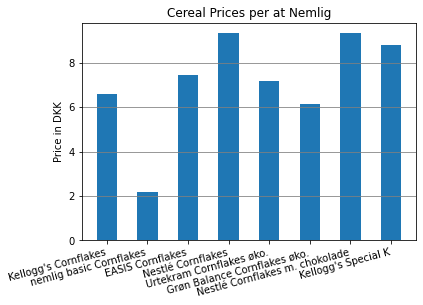

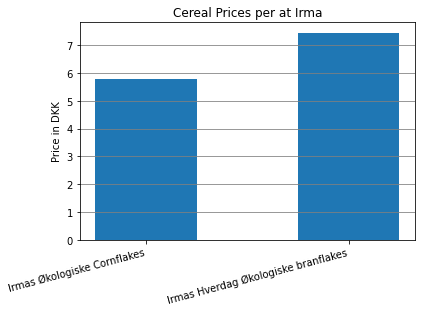

In [10]:
import modules.visualizing as vs
vs.show_prices(cereals)

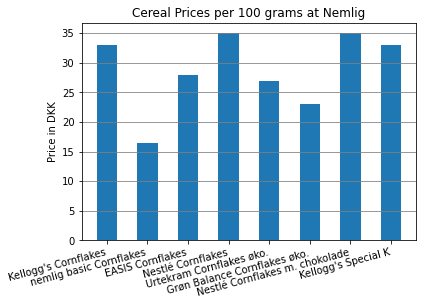

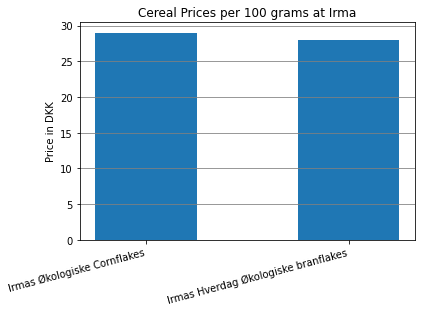

In [11]:
vs.show_prices(cereals, per_100g=True)

In [12]:
vs.show_nutrition(cereals)

Nutritional Content per 100 grams in Cereals


,Cereal Name,Calories,Protein,Carbohydrates,Fiber,Fat,Salt
0,Irmas Økologiske Cornflakes,371.0 kcal,8.0 g,80.0 g,5.0 g,1.0 g,1.2 g
1,Irmas Hverdag Økologiske branflakes,355.0 kcal,11.0 g,65.0 g,15.0 g,2.3 g,0.9 g
2,Kellogg's Cornflakes,378.0 kcal,7.0 g,84.0 g,3.0 g,0.9 g,1.13 g
3,nemlig basic Cornflakes,369.0 kcal,7.2 g,80.0 g,1.6 g,1.2 g,1.3 g
4,EASIS Cornflakes,401.0 kcal,8.8 g,76.4 g,15.1 g,3.2 g,0.98 g
5,Nestlé Cornflakes,381.0 kcal,7.4 g,82.6 g,0 g,1.4 g,1.82 g
6,Urtekram Cornflakes øko.,400.0 kcal,7.4 g,83.4 g,3.2 g,1.1 g,1.3 g
7,Grøn Balance Cornflakes øko.,383.0 kcal,7.2 g,84.0 g,0 g,1.3 g,0.99 g
8,Nestlé Cornflakes m. chokolade,393.0 kcal,6.1 g,81.9 g,4.0 g,3.7 g,1.06 g
9,Kellogg's Special K,372.0 kcal,9.3 g,78.0 g,4.8 g,1.5 g,1.0 g


In [13]:
vs.show_recommended_nutrition()

Daily Recommended Maximum Nutritional Intake


,Sex,Calories,Protein,Carbohydrates,Fiber,Fat,Salt
0,Female,2000 kcal,45 g,325 g,25 g,77 g,6 g
1,Male,2500 kcal,55.5 g,325 g,38 g,77 g,6 g


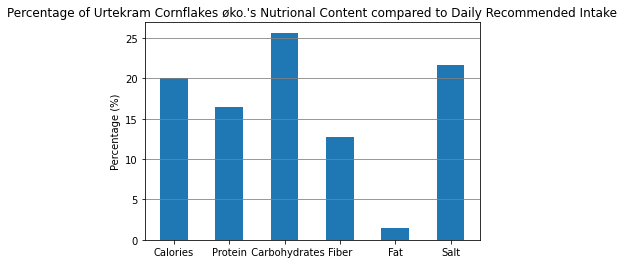

In [14]:
import random

idx = random.randint(0, len(cereals))
vs.show_pct_of_recommended_nutrition(cereals[idx], 'female')